In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create a DataFrame
df = pd.read_csv('cardata.csv')
df

,Car Model,Horsepower,Weight,MPG,Price
0,Car A,130,3500,22,20000
1,Car B,165,3700,18,25000
2,Car C,150,3400,20,23000
3,Car D,180,4000,16,27000
4,Car E,140,3300,24,21000
...,...,...,...,...,...
73,Car BV,170,3750,18,25500
74,Car BW,180,4050,17,27500
75,Car BX,165,3400,22,24500
76,Car BY,150,3250,24,23000


In [3]:
# function to arrange the dataframe in matrix form (i.e 2d array)
new_df = df.drop(['Price', 'Car Model'], axis = 1)
x = np.zeros((len(new_df), len(new_df.columns)), dtype=int)
for i in range(len(new_df)):
    x[i] = new_df.iloc[i].values

#### Arranging all the input labels in the matrix form as:
$$ x = \begin{bmatrix} x^0_0\quad x^0_1\quad x^0_2\quad ...\quad x^0_{(n-1)}\\ x^1_0\quad x^1_1\quad x^1_2\quad ...\quad x^1_{(n-1)}\\ \vdots \\ x^{(m-1)}_{0}\quad x^{(m-1)}_1\quad x^{(m-1)}_2\quad ...\quad x^{(m-1)}_{(n-1)} \end{bmatrix}$$

In [4]:
# function caluclate f(x) = wx + b for a single j, where w and x are vectors (i.e numpy array here)
def prediction(x,w,b):
    pr = np.dot(w,x)
    pr = pr+b
    return pr

# function to calculate f(x) = wx + b for all m rows of a training dataset
def prediction_data(w,x,b):
    m = x.shape[0]
    n = x.shape[1]
    p = np.zeros(m, dtype=int)
    for i in range(m):
        p[i] =prediction(x[i,:],w,b)
    return p

In [5]:
w = [3,4,6]
y_hat= prediction_data(w,x,200)
y_hat

array([14722, 15603, 14370, 16836, 13964, 15239, 16006, 13603, 13185,
       16412, 14531, 15012, 13773, 17451, 14194, 15430, 15791, 14809,
       13370, 16627, 14612, 15003, 13579, 17248, 14230, 15609, 13988,
       13170, 16021, 14806, 13567, 12761, 15385, 15818, 17042, 14427,
       13794, 13376, 16221, 15006, 13967, 12955, 15185, 15618, 16842,
       14627, 13594, 13176, 16421, 14806, 13373, 12755, 15385, 15818,
       17042, 14427, 13794, 13376, 16221, 15006, 13967, 12955, 15185,
       15618, 16842, 14627, 13594, 13176, 16421, 14806, 13373, 12755,
       15385, 15818, 17042, 14427, 13794, 13376])

In [6]:
# function to scale a particular feature and return a np array of scaled feature
# used 'dividing by maximum' approach of feature scaling
def feature_scale(df,feature):
    '''
    df : a pandas DataFrame, here a dataframe which contains only input_labels
    feature : column of the df
    '''
    m = df[feature].shape[0]
    feature_scaled = np.zeros(m)
    feature_max = df[feature].max()
    for i in range(m):
        feature_scaled[i] = df[feature].iloc[i]/feature_max
    return feature_scaled

#function to scale all feature of a df and return a df
def scale_all(df):
    n = df.columns.shape[0]
    zero_data = np.zeros(shape=(len(df), n))
    df_scaled = pd.DataFrame(zero_data, columns= df.columns)
    for i in range(n):
        df_scaled[df_scaled.columns[i]] = feature_scale(df,df.columns[i])
    return df_scaled

In [7]:
df_toScale = df.drop('Car Model', axis = 1)
scaled_df = scale_all(df_toScale)
scaled_df

,Horsepower,Weight,MPG,Price
0,0.702703,0.843373,0.846154,0.727273
1,0.891892,0.891566,0.692308,0.909091
2,0.810811,0.819277,0.769231,0.836364
3,0.972973,0.963855,0.615385,0.981818
4,0.756757,0.795181,0.923077,0.763636
...,...,...,...,...
73,0.918919,0.903614,0.692308,0.927273
74,0.972973,0.975904,0.653846,1.000000
75,0.891892,0.819277,0.846154,0.890909
76,0.810811,0.783133,0.923077,0.836364


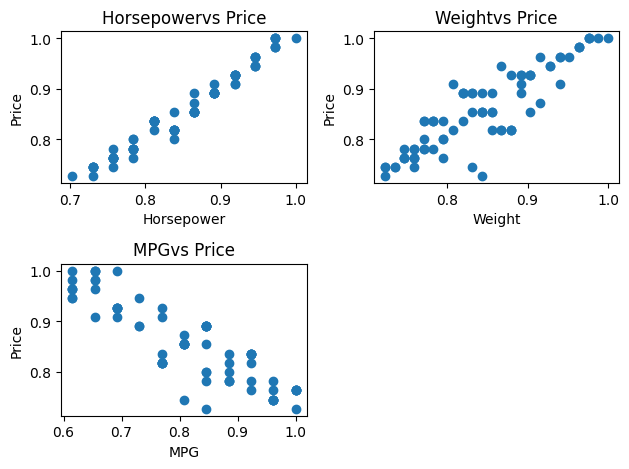

In [8]:
figure,axes = plt.subplots(2,2)
for (i, feature) in enumerate(scaled_df):
    axes[i//2, i%2].scatter(scaled_df[feature], scaled_df['Price'])
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].set_ylabel('Price')
    axes[i//2, i%2].set_title(feature + 'vs Price')
figure.tight_layout()
figure.delaxes(axes[1,1])

### Regression model, cost function and gradient descent
$$ \hat y = w_1x_1 + w_2x_2 + w_3x_3 + b$$
$$ f_{\vec w, b}(\vec x) = \vec w .\vec x +b$$
- const function
$$ J(\vec w,b)= \frac{1}{2m} \sum_{i=0}^{m-1}(f_{\vec w ,b}(x^i) - y^i)^2 $$

In [9]:
x = np.array([scaled_df['Horsepower'], scaled_df['Weight'], scaled_df['MPG']])
w = np.array([0,0,0], dtype=float).reshape(1,3)
y = np.array([scaled_df['Price']])
x = x.transpose()
y = y.transpose()

In [10]:
def cost_function(x,y,w,b):
    m = x.shape[0]
    summation = 0
    fx = np.zeros(m)
    for i in range(m):
        fx[i]= w.dot(x[i]) + b
        summation += (fx[i] - y[i])**2
    jw = summation/(2*m)
    return jw

In [11]:
cost_function(x,y,w, 1)

array([0.01336088])

# gradient
$$ \frac{\partial J(\vec w, b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1}(f_{\vec w,b}(x^i) - y^i)x^i_j $$

In [12]:
def calc_gradient(x,y,w,b):
    m = x.shape[0]
    n = x.shape[1]
    fx = np.zeros(m)
    dj_dw = np.zeros(n)
    inner = 0
    for i in range(n):
        inner = 0
        for j in range(m):
            fx[j] = w.dot(x[j]) + b
            inner += (fx[j] - y[j])*x[j][i]
        dj_dw[i] = inner/m

    dj_db = (((w.dot(x.transpose()) + b) - y.transpose()).sum())/m
    return dj_dw, dj_db
            

In [13]:
dw, db = calc_gradient(x,y,w,1)

In [14]:
x.shape, y.shape, w.shape

((78, 3), (78, 1), (1, 3))

In [26]:
def gradient_descent(x,y,w,b,alpha):
    dw, db = calc_gradient(x,y,w,1)
    n = w.shape[1]
    runit = True
    cost_history = []
    count = 0
    while(runit):
        count += 1
        for i in range(n):
            w[0,i] = w[0,i] - alpha * dw[i]
        b = b - alpha * db
        cost = cost_function(x,y,w,b)
        cost_history.append(cost)
        if(cost < 0.001 or count == 90000):
            runit = False
    return w,b, count, cost,cost_history

In [27]:
x = np.array([scaled_df['Horsepower'], scaled_df['Weight'], scaled_df['MPG']])
w = np.array([1,1,-1], dtype=float).reshape(1,3)
y = np.array([scaled_df['Price']])
x = x.transpose()
y = y.transpose()
w_opt, b_opt, iterations, cost, cost_history = gradient_descent(x,y,w,0,0.0000001)

In [28]:
iterations
len(cost_history) , w_opt, b_opt,cost

(90000,
 array([[ 0.99201075,  0.99208436, -1.00729517]]),
 np.float64(-0.009239970062989832),
 array([0.01797852]))

Text(0, 0.5, 'cost')

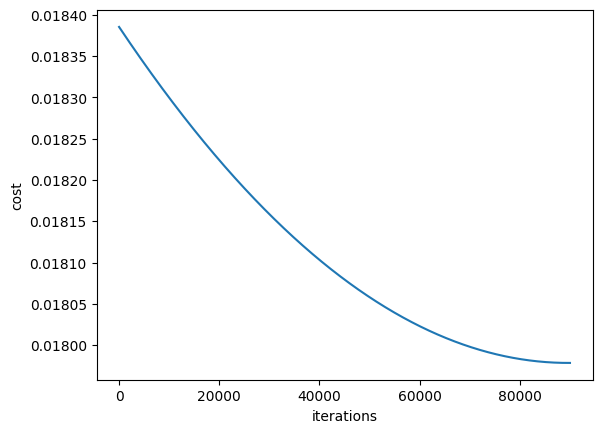

In [29]:
plt.plot(cost_history)
plt.xlabel('iterations')
plt.ylabel('cost')

In [19]:
x.shape , w_opt.shape, b_opt

((78, 3), (1, 3), np.float64(-0.051333167016682855))